In [50]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
path = '/content/drive/MyDrive/Colab Notebooks/성신신성/현준/data/iris.data'

In [29]:
iris = datasets.load_iris()
names = iris.feature_names
names.append('Class')

In [30]:
names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'Class']

In [31]:
dataset = pd.read_csv(path, names = names)

In [33]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [44]:
X = dataset.iloc[ : , : -1].values
y = dataset.iloc[:,4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

s = StandardScaler()

s.fit(X_train)

X_train = s.transform(X_train)
X_test = s.transform(X_test)

In [48]:
# k = 50인 모델 생성
knn = KNeighborsClassifier(n_neighbors=50)

# 모델 훈련
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [51]:
y_pred = knn.predict(X_test)
print("정확도: {}".format(accuracy_score(y_test, y_pred)))

정확도: 0.9


In [56]:
# 최적의 K값 찾아보기 
# k값을 1~ 10 까지 돌려보기

k = 10
acc_array =  np.zeros(k)

for k in np.arange(1, k+1, 1): # 그냥 1부터 10이랑 같은거
  classifier = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  acc = metrics.accuracy_score(y_test, y_pred)
  acc_array[k-1] = acc

max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print("정확도", max_acc, "으로 최적의 k는", k+1)

정확도 1.0 으로 최적의 k는 5


# 서포트 벡터머신 SVM

In [69]:
from sklearn.svm import SVC

from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os

# 로깅제어
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [64]:
iris = datasets.load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size = 0.6,
                                                    random_state =42)

In [71]:
svm = SVC(kernel = 'linear', C= 1.0, gamma = 0.5)
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)
score = metrics.accuracy_score(y_test, predictions)

print("정확도 :{0:f}".format(score))

정확도 :0.988889


# 결정 트리

In [97]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [73]:
train_path = '/content/drive/MyDrive/Colab Notebooks/성신신성/현준/data/titanic/train.csv'

In [75]:
df = pd.read_csv(train_path,index_col = 'PassengerId')

In [76]:
df =df[['Pclass', 'Sex', 'Age','SibSp','Parch', 'Fare','Survived']]

# 성별을 0 또는 1로 변환
df['Sex'] = df['Sex'].map({'male' : 0, 'female':1})

# 결측지 드랍
df = df.dropna()

X = df.drop('Survived', axis =1)

# 정답 데이터
y = df['Survived']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state =1)

In [84]:
# 모델 새성
model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)

# 예측
y_predict = model.predict(X_test)

# 정확도
accuracy_score(y_test, y_predict)

0.8324022346368715

In [87]:
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns = ['생존X 예측','생존O 예측'],
    index = ['진짜 생존X', '진짜 생존0']
)

,생존X 예측,생존O 예측
진짜 생존X,99,13
진짜 생존0,17,50


# 로지스틱 회귀 분석

In [107]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import numpy as np
%matplotlib inline

In [93]:
digits = load_digits()

print("digits.shape", digits.data.shape)
print("label data.shape", digits.target.shape)

digits.shape (1797, 64)
label data.shape (1797,)


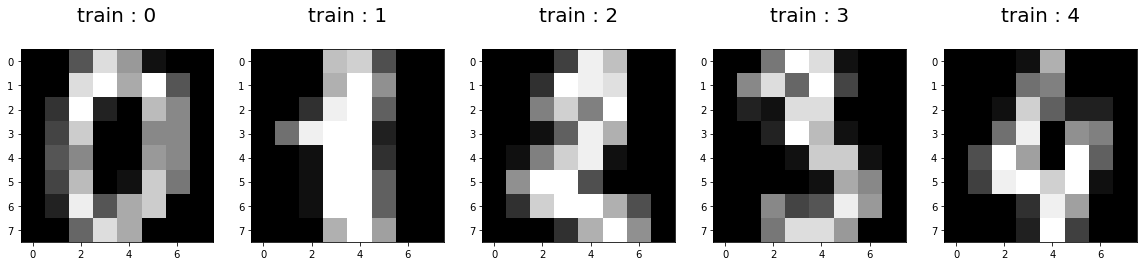

In [96]:
plt.figure(figsize = (20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8, 8)), cmap = plt.cm.gray)
  plt.title('train : %i\n' %label, fontsize = 20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                    test_size = 0.25, random_state = 0)


In [106]:
# 로지스틱 모델 객체 생성
logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
logisticRegr.predict(X_test[0].reshape(1, -1))
logisticRegr.predict(X_test[0: 10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [104]:
predictions = logisticRegr.predict(X_test)
score = logisticRegr.score(X_test, y_test)
print("정확도", score)

정확도 0.9511111111111111


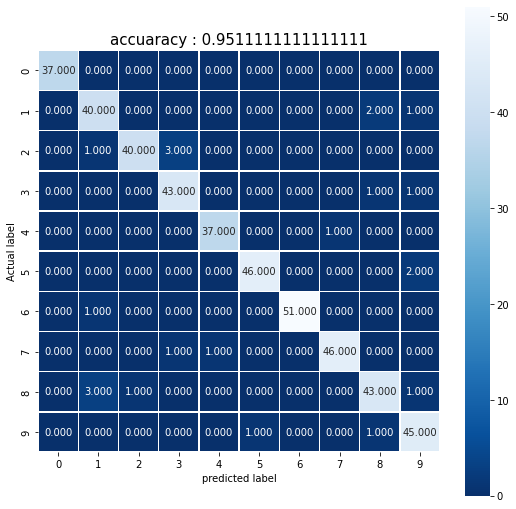

In [105]:
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize = (9, 9))
sns.heatmap(cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('predicted label')
sample = 'accuaracy : {0}'.format(score)
plt.title(sample, size = 15)
plt.show()

# 선형회귀


In [108]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
import numpy as np

%matplotlib inline

In [109]:
path = '/content/drive/MyDrive/Colab Notebooks/성신신성/현준/data/weather.csv'

In [110]:
datasets = pd.read_csv(path)

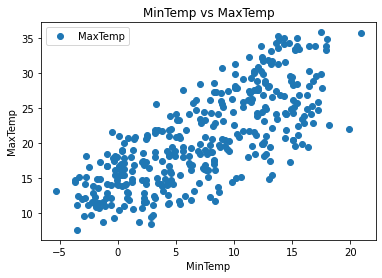

In [111]:
# 분포확인
# 시각화

datasets.plot(x = 'MinTemp', y = 'MaxTemp', style = 'o')
plt.title("MinTemp vs MaxTemp")
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [113]:
X = datasets['MinTemp'].values.reshape(-1, 1)
y = datasets['MaxTemp'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.2)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
# 예측
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,17.1,14.793781
1,22.8,28.547141
2,10.4,14.456276
3,24.3,27.112742
4,13.8,12.599994
...,...,...
69,28.5,21.375144
70,15.5,14.540652
71,21.1,24.412695
72,20.7,18.928227


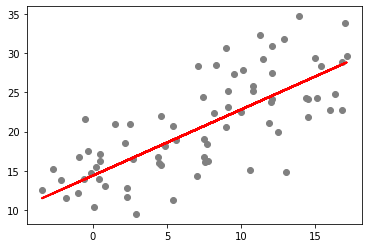

In [118]:
# 검증 데이터셋을 직선으로
plt.scatter(X_test, y_test, color= 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth =2)
plt.show()

In [119]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
import numpy as np
from sklearn.cluster import KMeans

In [120]:
path = '/content/drive/MyDrive/Colab Notebooks/성신신성/현준/data/sales data.csv'

In [125]:
data = pd.read_csv(path)
data.head()
# channel : 고객 채널
# region : 고객지역
# Fresh :  신선한 제품에 대한 연간 지출
# Milk : 유제품에 대한 연간 지출
# Grocery : 식료품에 대한 연간 지출
# Frozen : 냉동 제품에 대한 연간 지출
# Detergents_paper : 세제 및 종이 제품~~
# Delicassen : 조제 식품 ~~

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [126]:
# 명목형 데이터 :  범주간에 순서 의미가 없는 자료(ex)혈액형
categorical_features = ['Channel' ,'Region']

# 연속형
continuous_features = ['Fresh', 'Milk', 'Grocery','Frozen','Detergents_Paper', 'Delicassen']

for col in categorical_features:
  dummies = pd.get_dummies(data[col], prefix =col)
  data = pd.concat([data, dummies], axis = 1)
  data.drop(col, axis =1 , inplace = True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [127]:
# 연속형 데이터의 모든 특성에 동일하게 중요성을 부여하기 위해 스케일링
# 범위가 다르기 떄문에 범위 조정

scaler = MinMaxScaler()
scaler.fit(data)
data_transformed = scaler.transform(data)

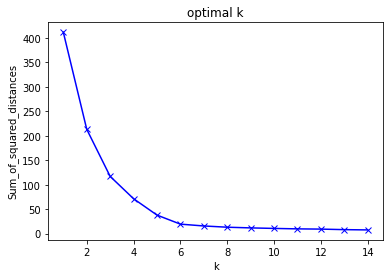

In [128]:
Sum_of_squared_distances = []
K = range(1, 15)

for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(data_transformed)
  Sum_of_squared_distances.append(km.inertia_)

plt.plot(K,Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('optimal k')
plt.show()

# 밀도기반 군집 분석과 PCA

In [130]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, LinearRegression
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

In [131]:
path = '/content/drive/MyDrive/Colab Notebooks/성신신성/현준/data/credit card.csvb'

In [132]:
X = pd.read_csv(path)

# 컬럼 삭제
X = X.drop('CUST_ID', axis = 1)

# 결측값들을 앞의 값들로 채움
X.fillna(method = 'ffill',inplace = True)
print(X.head())

       BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
0    40.900749           0.818182  ...          0.000000      12
1  3202.467416           0.909091  ...          0.222222      12
2  2495.148862           1.000000  ...          0.000000      12
3  1666.670542           0.636364  ...          0.000000      12
4   817.714335           1.000000  ...          0.000000      12

[5 rows x 17 columns]


In [133]:
scaler = StandardScaler()

# 평균이 0, 표준편차가 1이 되도록 데이터 크기 조정
X_scaled = scaler.fit_transform(X)

# 데이터가 가우스 분포를 따르도록 정규화
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

# 2차원으로 차원 축소 선언
pca = PCA(n_components = 2)

# 차원 축소 적용
X_principal = pca.fit_transform(X_normalized)

X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544828
2  0.330633  0.268879
3 -0.481656 -0.097610
4 -0.563512 -0.482505


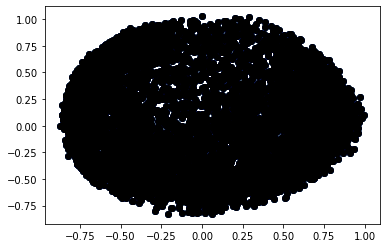

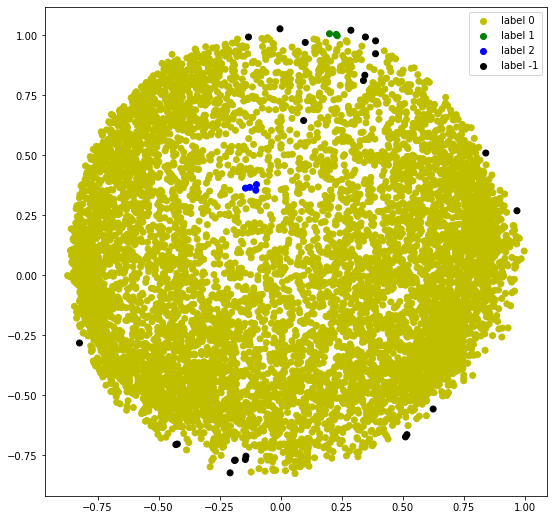

In [134]:
# 모델 생성 및 훈련
db_default = DBSCAN(eps = 0.0375, min_samples =3).fit(X_principal)

labels = db_default.labels_

colours = {}
colours[0] = 'y'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]

r = plt.scatter(X_principal['P1'],  X_principal['P2'], color = 'y')
g = plt.scatter(X_principal['P1'],  X_principal['P2'], color = 'g')
b = plt.scatter(X_principal['P1'],  X_principal['P2'], color = 'b')
k = plt.scatter(X_principal['P1'],  X_principal['P2'], color = 'k')

plt.figure(figsize = (9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)

plt.legend((r, g, b, k), ('label 0','label 1','label 2','label -1' ))
plt.show()

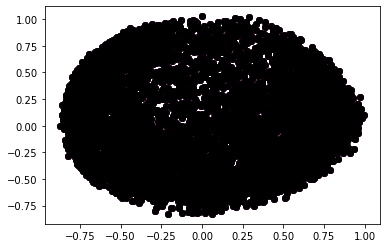

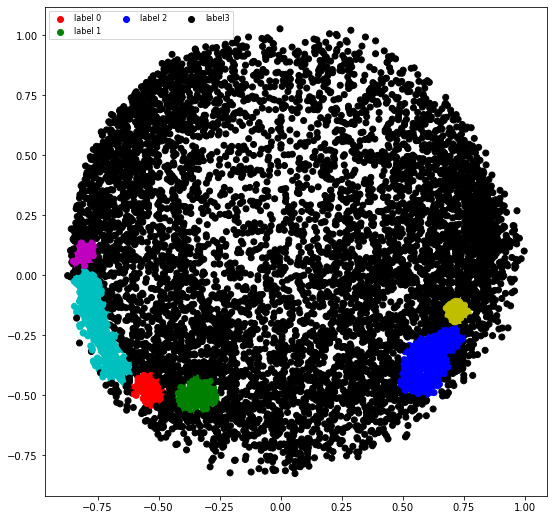

In [135]:
# 모델 생성 및 훈련
db_default = DBSCAN(eps = 0.0375, min_samples =50).fit(X_principal)

labels = db_default.labels_

colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'c'
colours[4] = 'y'
colours[5] = 'm'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]
colors1 = ['r','g','b','c','y','m','k']
r = plt.scatter(X_principal['P1'],  X_principal['P2'], color = colors1[0])
g = plt.scatter(X_principal['P1'],  X_principal['P2'], color = colors1[1])
b = plt.scatter(X_principal['P1'],  X_principal['P2'], color = colors1[2])
c = plt.scatter(X_principal['P1'],  X_principal['P2'], color = colors1[3])
y = plt.scatter(X_principal['P1'],  X_principal['P2'], color = colors1[4])
m= plt.scatter(X_principal['P1'],  X_principal['P2'], color = colors1[5])
k= plt.scatter(X_principal['P1'],  X_principal['P2'], color = colors1[6])
plt.figure(figsize = (9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)

plt.legend((r, g, b, k), ('label 0','label 1','label 2','label3','label4','label5' ,'label-1' ),
           scatterpoints = 1,
           loc = 'upper left',
           ncol =3,
           fontsize =8)
plt.show()